# Import

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

\
\
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
\
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
import joblib

#
\
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
\
from sklearn.naive_bayes import GaussianNB ,BernoulliNB ,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Data Preprocessing

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/indian_liver_patient.csv")

In [ ]:
# IN BELOW THERE IS SHOWN THAT WHICH COLUMNS HAVE HIGNLY CORELATION IN THE dICTIONARY FORMAT

# Calculate the correlation matrix
corr_matrix = df.corr()

# Create an empty dictionary
correlation_dict = {}

# Iterate over the correlation matrix
for column in corr_matrix:
    correlations = corr_matrix[column][corr_matrix[column] > 0.50]
    if not correlations.empty:
        correlation_dict[column] = correlations.index.tolist()

# Print the dictionary
print("Row-Column pairs with correlation above 0.50:")
print(correlation_dict)
print()

                                                                 ## to find the corelation between all colummns           Direct_Billirubin and Total_bILLIRUBIN
                                                                  ##        Alamine_Aminotransferase and Alamine_Aminotransferase  \ \
                                                                  ##        Albumin and Total_Protiens

Row-Column pairs with correlation above 0.50:
{'Age': ['Age'], 'Total_Bilirubin': ['Total_Bilirubin', 'Direct_Bilirubin'], 'Direct_Bilirubin': ['Total_Bilirubin', 'Direct_Bilirubin'], 'Alkaline_Phosphotase': ['Alkaline_Phosphotase'], 'Alamine_Aminotransferase': ['Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], 'Aspartate_Aminotransferase': ['Alamine_Aminotransferase', 'Aspartate_Aminotransferase'], 'Total_Protiens': ['Total_Protiens', 'Albumin'], 'Albumin': ['Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio'], 'Albumin_and_Globulin_Ratio': ['Albumin', 'Albumin_and_Globulin_Ratio'], 'Dataset': ['Dataset']}



<ipython-input-4-71ea3732595a>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
df_gh = df.drop("Gender",axis = 1)

Visualizing Attribute and Cheaking for the outliers

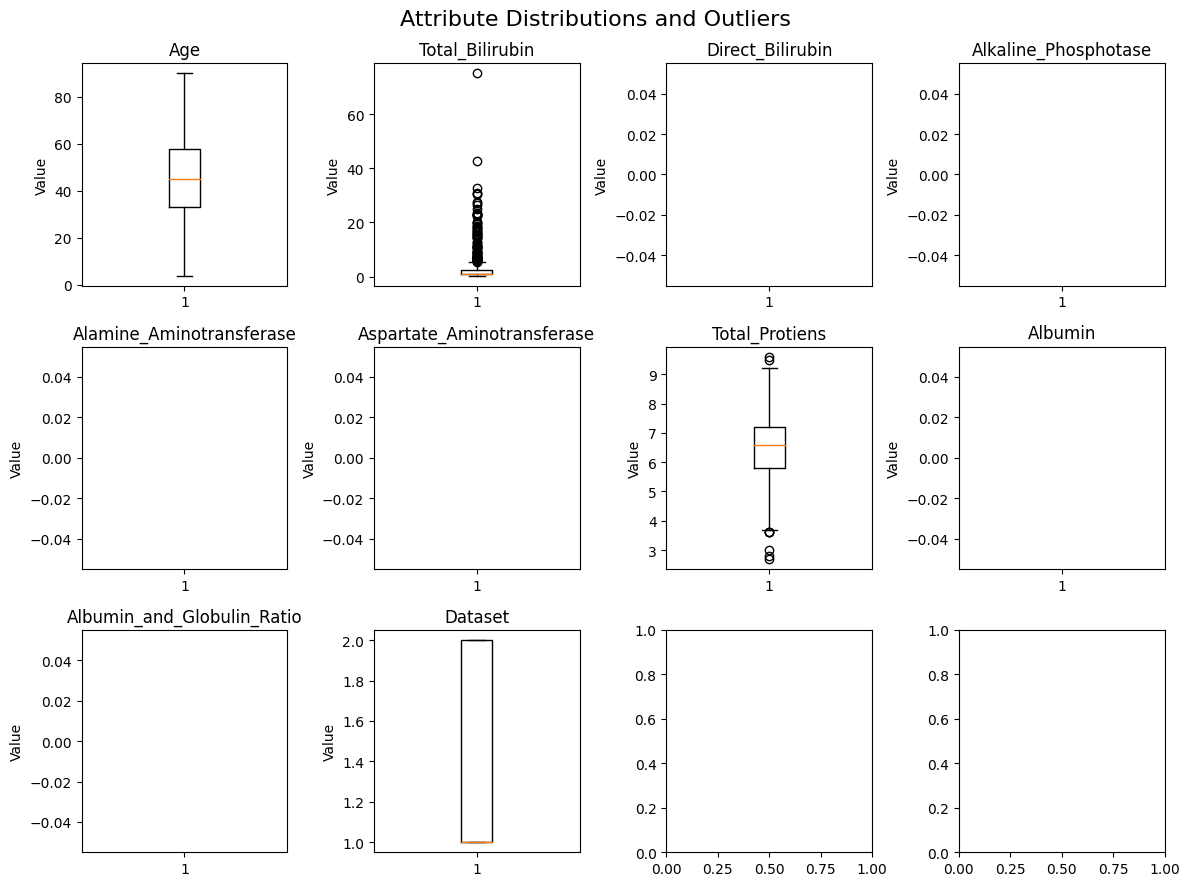

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Outliers', fontsize=16)
# Iterate over the columns and create box plots
for i, column in enumerate(df_gh.columns):
    ax = axes[i // 4, i % 4]
    ax.boxplot(df_gh[column])
    ax.set_title(column)
    ax.set_ylabel('Value')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


Attribute Distribution And Dispersion

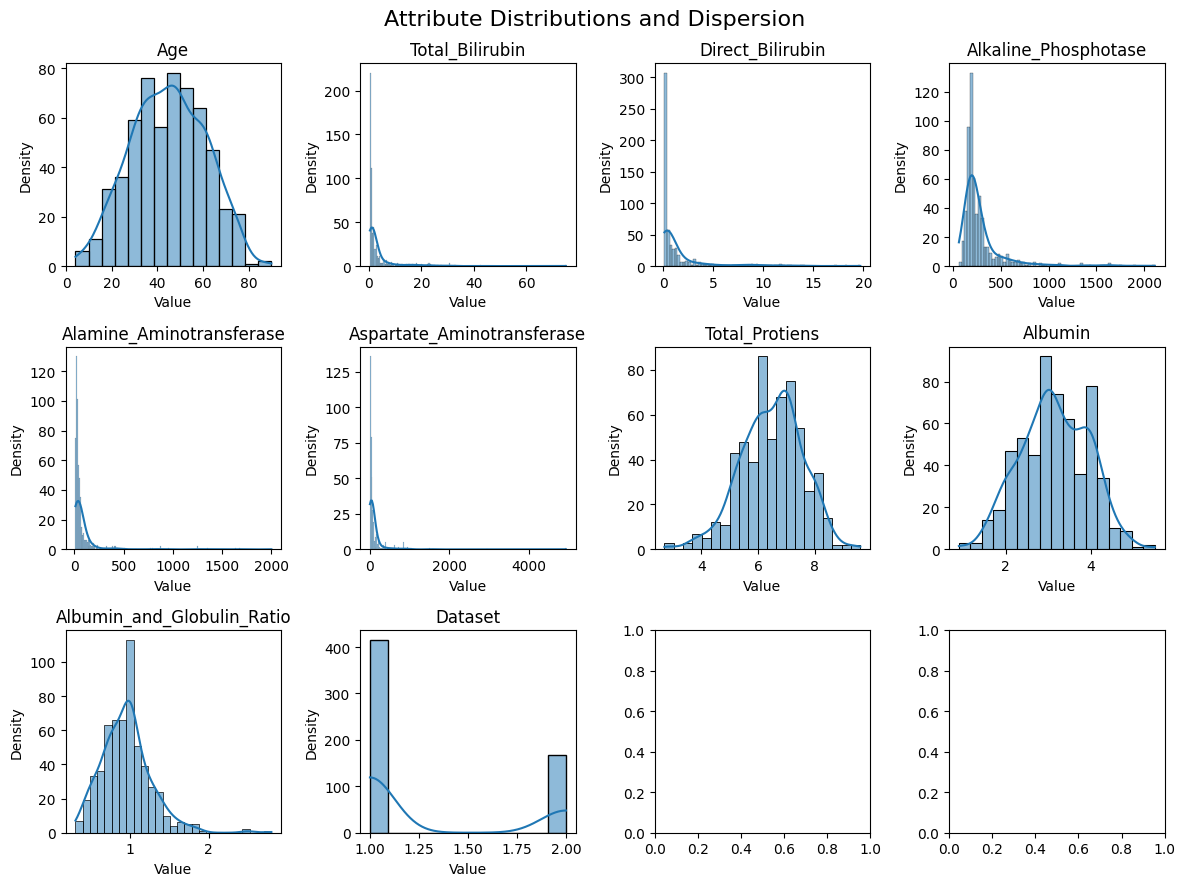

In [ ]:
# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(12, 9))
fig.suptitle('Attribute Distributions and Dispersion', fontsize=16)

# Iterate over the columns and create distribution plots
for i, column in enumerate(df_gh.columns):
    ax = axes[i // 4, i % 4]
    sns.histplot(data=df_gh, x=column, kde=True, ax=ax)
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
df.isna().sum()

Age                           0
Gender                        3
Total_Bilirubin               0
Direct_Bilirubin              1
Alkaline_Phosphotase          2
Alamine_Aminotransferase      2
Aspartate_Aminotransferase    3
Total_Protiens                0
Albumin                       1
Albumin_and_Globulin_Ratio    5
Dataset                       0
dtype: int64

In [ ]:
df['Albumin'].fillna(int(df['Albumin'].mean()), inplace=True)

In [ ]:
for ind,row in df.iterrows():
  df.loc[ind,"Albumin_and_Globulin_Ratio"] = row["Albumin"]/ (row["Total_Protiens"]-row["Albumin"])

In [ ]:
df['Direct_Bilirubin'].fillna(int(df['Direct_Bilirubin'].mean()), inplace=True)

In [ ]:
df['Alkaline_Phosphotase'].fillna(int(df['Alkaline_Phosphotase'].mean()), inplace=True)

In [ ]:
df['Aspartate_Aminotransferase'].fillna(int(df['Aspartate_Aminotransferase'].mean()), inplace=True)

In [ ]:
df['Alamine_Aminotransferase'].fillna(int(df['Alamine_Aminotransferase'].mean()), inplace=True)

In [ ]:
df2 = df.sort_values('Gender', ascending=True)
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.942857,1
485,22,Female,6.7,3.2,850.0,154.0,248.0,6.2,2.8,0.823529,1
123,64,Female,0.8,0.2,178.0,17.0,18.0,6.3,3.1,0.968750,1
128,58,Female,1.7,0.8,1896.0,61.0,83.0,8.0,3.9,0.951220,1
243,28,Female,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.833333,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21.0,24.0,7.3,4.4,1.517241,2
27,34,dsfsf,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2


# Slicing Of Data for Gender Column

In [ ]:
df_1 =pd.DataFrame(df2.tail(4))
df_1.drop(["Gender"],axis = 1,inplace = True)
df_1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
27,34,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2
57,48,0.9,0.2,175.0,24.0,110.0,5.5,2.7,0.964286,2


# Creating The Model For Filliing the Data in the Gender Column

In [ ]:
df2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.942857,1
485,22,Female,6.7,3.2,850.0,154.0,248.0,6.2,2.8,0.823529,1
123,64,Female,0.8,0.2,178.0,17.0,18.0,6.3,3.1,0.968750,1
128,58,Female,1.7,0.8,1896.0,61.0,83.0,8.0,3.9,0.951220,1
243,28,Female,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.833333,1
...,...,...,...,...,...,...,...,...,...,...,...
582,38,Male,1.0,0.3,216.0,21.0,24.0,7.3,4.4,1.517241,2
27,34,dsfsf,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,NaN,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,NaN,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2


In [ ]:
df_2 = df2.iloc[:-4 , :]
df_2 = df_2.reset_index(drop=True)

### Encoding by Label Encoding
num = preprocessing.LabelEncoder()
df_2[ 'Gender' ]= num.fit_transform(df_2[ 'Gender' ])
df_2

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.942857,1
1,22,0,6.7,3.2,850.0,154.0,248.0,6.2,2.8,0.823529,1
2,64,0,0.8,0.2,178.0,17.0,18.0,6.3,3.1,0.968750,1
3,58,0,1.7,0.8,1896.0,61.0,83.0,8.0,3.9,0.951220,1
4,28,0,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.833333,1
...,...,...,...,...,...,...,...,...,...,...,...
574,21,1,0.7,0.2,135.0,27.0,26.0,6.4,3.3,1.064516,2
575,21,1,1.0,0.3,142.0,27.0,21.0,6.4,3.5,1.206897,2
576,49,1,0.6,0.1,218.0,50.0,53.0,5.0,2.4,0.923077,1
577,41,1,0.9,0.2,169.0,22.0,18.0,6.1,3.0,0.967742,2


In [ ]:
x = df_2.drop(["Gender"],axis = 1)
y = df_2["Gender"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3 ,random_state =0)

In [ ]:
# model = RandomForestClassifier()
model = GradientBoostingClassifier()
model.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

In [ ]:
accuracy_score(y_test,y_pred)

0.7471264367816092

In [ ]:
df_1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
27,34,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2
57,48,0.9,0.2,175.0,24.0,110.0,5.5,2.7,0.964286,2


In [ ]:
y_pred1 = model.predict(df_1)
y_pred1

array([1, 1, 0, 0])

In [ ]:
df_1['Gender'] = y_pred1
df_1

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Gender
27,34,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1,1
9,55,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1,1
29,84,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2,0
57,48,0.9,0.2,175.0,24.0,110.0,5.5,2.7,0.964286,2,0


In [ ]:
df_final = pd.concat([df_2, df_1])
df_final

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.942857,1
1,22,0,6.7,3.2,850.0,154.0,248.0,6.2,2.8,0.823529,1
2,64,0,0.8,0.2,178.0,17.0,18.0,6.3,3.1,0.968750,1
3,58,0,1.7,0.8,1896.0,61.0,83.0,8.0,3.9,0.951220,1
4,28,0,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.833333,1
...,...,...,...,...,...,...,...,...,...,...,...
578,38,1,1.0,0.3,216.0,21.0,24.0,7.3,4.4,1.517241,2
27,34,1,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,0,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2


In [ ]:
df_final.sort_values('Age', ascending=True)
df_final

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.942857,1
1,22,0,6.7,3.2,850.0,154.0,248.0,6.2,2.8,0.823529,1
2,64,0,0.8,0.2,178.0,17.0,18.0,6.3,3.1,0.968750,1
3,58,0,1.7,0.8,1896.0,61.0,83.0,8.0,3.9,0.951220,1
4,28,0,0.9,0.2,316.0,25.0,23.0,8.5,5.5,1.833333,1
...,...,...,...,...,...,...,...,...,...,...,...
578,38,1,1.0,0.3,216.0,21.0,24.0,7.3,4.4,1.517241,2
27,34,1,6.2,3.0,240.0,1680.0,850.0,7.2,4.0,1.250000,1
9,55,1,0.7,0.2,290.0,53.0,58.0,6.8,3.4,1.000000,1
29,84,0,0.7,0.2,188.0,13.0,21.0,6.0,3.0,1.000000,2


In [ ]:
df_final["Gender"].value_counts()

1    441
0    142
Name: Gender, dtype: int64

# Normalization

In [ ]:
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(df_final)
norm_df


array([[0.70930233, 0.        , 0.00402145, ..., 0.52173913, 0.24431487,
        0.        ],
       [0.20930233, 0.        , 0.0844504 , ..., 0.41304348, 0.20048019,
        0.        ],
       [0.69767442, 0.        , 0.00536193, ..., 0.47826087, 0.25382653,
        0.        ],
       ...,
       [0.59302326, 1.        , 0.00402145, ..., 0.54347826, 0.26530612,
        0.        ],
       [0.93023256, 0.        , 0.00402145, ..., 0.45652174, 0.26530612,
        1.        ],
       [0.51162791, 0.        , 0.00670241, ..., 0.39130435, 0.25218659,
        1.        ]])

In [ ]:
norm_df = pd.DataFrame(norm_df,columns=df_final.columns)
norm_df = norm_df.round(2)
norm_df.drop(["Age"],axis =1,inplace =True)
norm_df

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,0.0,0.00,0.00,0.06,0.00,0.00,0.59,0.52,0.24,0.0
1,0.0,0.08,0.16,0.38,0.07,0.05,0.51,0.41,0.20,0.0
2,0.0,0.01,0.01,0.06,0.00,0.00,0.52,0.48,0.25,0.0
3,0.0,0.02,0.04,0.90,0.03,0.01,0.77,0.65,0.25,0.0
4,0.0,0.01,0.01,0.12,0.01,0.00,0.84,1.00,0.57,0.0
...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.01,0.01,0.07,0.01,0.00,0.67,0.76,0.46,1.0
579,1.0,0.08,0.15,0.09,0.84,0.17,0.65,0.67,0.36,0.0
580,1.0,0.00,0.01,0.11,0.02,0.01,0.59,0.54,0.27,0.0
581,0.0,0.00,0.01,0.06,0.00,0.00,0.48,0.46,0.27,1.0


In [ ]:
Age = df.iloc[:,[0]]
norm_df["Age"] =  Age

In [ ]:
norm_df

,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset,Age
0,0.0,0.00,0.00,0.06,0.00,0.00,0.59,0.52,0.24,0.0,65
1,0.0,0.08,0.16,0.38,0.07,0.05,0.51,0.41,0.20,0.0,62
2,0.0,0.01,0.01,0.06,0.00,0.00,0.52,0.48,0.25,0.0,62
3,0.0,0.02,0.04,0.90,0.03,0.01,0.77,0.65,0.25,0.0,58
4,0.0,0.01,0.01,0.12,0.01,0.00,0.84,1.00,0.57,0.0,72
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,0.01,0.01,0.07,0.01,0.00,0.67,0.76,0.46,1.0,60
579,1.0,0.08,0.15,0.09,0.84,0.17,0.65,0.67,0.36,0.0,40
580,1.0,0.00,0.01,0.11,0.02,0.01,0.59,0.54,0.27,0.0,52
581,0.0,0.00,0.01,0.06,0.00,0.00,0.48,0.46,0.27,1.0,31


In [ ]:
m = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Alkaline_Phosphotase', 'Alamine_Aminotransferase', 'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin', 'Albumin_and_Globulin_Ratio', 'Dataset',]
norm_df = norm_df[m]
norm_df

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.0,0.00,0.00,0.06,0.00,0.00,0.59,0.52,0.24,0.0
1,62,0.0,0.08,0.16,0.38,0.07,0.05,0.51,0.41,0.20,0.0
2,62,0.0,0.01,0.01,0.06,0.00,0.00,0.52,0.48,0.25,0.0
3,58,0.0,0.02,0.04,0.90,0.03,0.01,0.77,0.65,0.25,0.0
4,72,0.0,0.01,0.01,0.12,0.01,0.00,0.84,1.00,0.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1.0,0.01,0.01,0.07,0.01,0.00,0.67,0.76,0.46,1.0
579,40,1.0,0.08,0.15,0.09,0.84,0.17,0.65,0.67,0.36,0.0
580,52,1.0,0.00,0.01,0.11,0.02,0.01,0.59,0.54,0.27,0.0
581,31,0.0,0.00,0.01,0.06,0.00,0.00,0.48,0.46,0.27,1.0


In [ ]:
# Saprating Data For Train And Test
x1 = norm_df.drop(["Dataset"],axis=1)
y1 = norm_df["Dataset"]
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size = 0.2 ,random_state =9)  ## 48

#  0.2  65  =  66

# Naive Baise

In [ ]:
#GB = BernoulliNB()
GB = MultinomialNB()

#GB = GaussianNB()
GB.fit(x1_train,y1_train)

MultinomialNB()

**In Above step i had seen that multinomial is best fit model that giving greatest accuracy than any other algorithm**

In [ ]:
GB_pred = GB.predict(x1_test)

In [ ]:
accuracy_score(y1_test,GB_pred)*100

70.08547008547008

In [ ]:
nb_scores = cross_val_score(GB, x1, y1, cv=5)
nb_scores

array([0.71794872, 0.70940171, 0.70940171, 0.71551724, 0.71551724])

In [ ]:
# Grid Search for Naïve Bayes
nb_grid_search = GridSearchCV(GB, param_grid={'alpha': [1e-09, 1e-08, 1e-07]}, cv=5)
nb_grid_search.fit(x1, y1)
best_nb_model_grid = nb_grid_search.best_estimator_
best_nb_model_grid

MultinomialNB(alpha=1e-09)

In [ ]:
# Naive Biayes evaluation
nb_model = best_nb_model_grid if nb_grid_search.best_score_ > nb_scores.mean() else GB
nb_model.fit(x1, y1)
nb_predictions = nb_model.predict(x1_test)
nb_predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Decision Tree

In [ ]:
DT = DecisionTreeClassifier(criterion='entropy')
DT.fit(x1_train,y1_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
DT_pred = DT.predict(x1_test)

In [ ]:
dt_scores = cross_val_score(DT, x1, y1, cv=5)
dt_scores

array([0.56410256, 0.5982906 , 0.67521368, 0.63793103, 0.67241379])

In [ ]:
# Random Search for Decision Tree
dt_random_search = RandomizedSearchCV(DT, param_distributions={'max_depth': [None, 10, 20]}, cv=5)
dt_random_search.fit(x1, y1)
best_dt_model_random = dt_random_search.best_estimator_
best_dt_model_random

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [ ]:
# Decision Tree evaluation
dt_model = best_dt_model_random if dt_random_search.best_score_ > dt_scores.mean() else DT
dt_model.fit(x1, y1)
dt_predictions = dt_model.predict(x1_test)
dt_predictions

array([0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.])

# Score
Evaluate the model using accuracy, confusion matrix, precision, recall and
F1-Scores

In [ ]:
# Accuracy
nb_accuracy = accuracy_score(y1_test,GB_pred )
dt_accuracy = accuracy_score(y1_test, DT_pred)

# Confusion Matrix
nb_cm = confusion_matrix(y1_test, GB_pred)
dt_cm = confusion_matrix(y1_test, DT_pred)

# Precision
nb_precision = precision_score(y1_test, GB_pred, average='weighted')
dt_precision = precision_score(y1_test, DT_pred, average='weighted')

# Recall
nb_recall = recall_score(y1_test, GB_pred, average='weighted')
dt_recall = recall_score(y1_test, DT_pred, average='weighted')

# F1-Score
nb_f1_score = f1_score(y1_test, GB_pred, average='weighted')
dt_f1_score = f1_score(y1_test, DT_pred, average='weighted')

print("Decision Tree Accuracy :",dt_accuracy)
print()
print("Decision Tree Confusion Matrix :",dt_cm)
print()
print("Decision Tree Precision :",dt_precision)
print()
print("Decision Tree Recall :",dt_recall)
print()
print("Decision Tree F1-Score :",dt_f1_score)
print()
print("Navi bais Accuracy :",nb_accuracy)
print()
print("Navi bais Confusion Matrix :",nb_cm)
print()
print("Navi bais Precision :",nb_precision)
print()
print("Navi bais Recall :",nb_recall)
print()
print("Navi bais F1-Score :",nb_f1_score)


Decision Tree Accuracy : 0.6410256410256411

Decision Tree Confusion Matrix : [[60 22]
 [20 15]]

Decision Tree Precision : 0.646916146916147

Decision Tree Recall : 0.6410256410256411

Decision Tree F1-Score : 0.6437955049066161

Navi bais Accuracy : 0.7008547008547008

Navi bais Confusion Matrix : [[82  0]
 [35  0]]

Navi bais Precision : 0.4911973117101322

Navi bais Recall : 0.7008547008547008

Navi bais F1-Score : 0.5775887986943264


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Create a DataFrame to store the results
results = pd.DataFrame({'Model': ['Decision Tree', 'Naïve Bayes'],
                       'Accuracy': [dt_accuracy, nb_accuracy],
                       'Precision': [dt_precision, nb_precision],
                       'Recall': [dt_recall, nb_recall],
                       'F1-Score': [dt_f1_score, nb_f1_score]})

# Save the results to a CSV file
results.to_csv('classification_results.csv', index=False)

# Saving the model


In [ ]:
import pickle

# Save the Decision Tree model
with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(dt_model, file)

# Save the Naïve Bayes model
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)





In [ ]:
with open('minmax.pkl','wb') as file:
    pickle.dump(scaler,file)


In [ ]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [ ]:
rf.fit(x1_train,y1_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf.predict(x1_test)
rf_pred

In [ ]:
rf_accuracy = accuracy_score(y1_test,rf_pred )
rf_accuracy

0.7521367521367521

In [ ]:
filename = 'random_forest_model.pkl'
pickle.dump(rf, open(filename, 'wb'))

From this total Accuracy Score this is conclude that in naive baise multinomial model is best fit model that is giving best Accuracy and appart from this Decision tree giving slightly higher Accuracy .